# Machine Learning - Logistic Regression Practice and KNN

## Question 1 (30 pts): Apply logistic regression to Scikit-learn Breast Cancer Dataset using 30% of dataset for test and 70% of dataset as training data. 

### Part 1: What is your model score?  

### Part 2: What is your model score with the same configuration if you only use columns ['mean texture','mean perimeter','mean smoothness','mean compactness','mean symmetry'] for training? 

### Answer:

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# ========================
# (a) Logistic Regression with All Features
# ========================

# Split into train/test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression
model_full = LogisticRegression(max_iter=10000)
model_full.fit(X_train_scaled, y_train)

# Model score with all features
score_full = model_full.score(X_test_scaled, y_test)
print(f"(a) Model score using all features: {score_full:.4f}")

# ========================
# (b) Logistic Regression with Selected Features
# ========================

# Convertion of data to DataFrame for feature selection
df = pd.DataFrame(X, columns=feature_names)

# Select subset of features
subset_cols = ['mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness', 'mean symmetry']
X_subset = df[subset_cols].values

# Train-test split
X_train_sub, X_test_sub, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)

# Scale subset features
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_test_sub_scaled = scaler.transform(X_test_sub)

# Fit logistic regression on subset
model_subset = LogisticRegression(max_iter=10000)
model_subset.fit(X_train_sub_scaled, y_train)

# Model score with subset of features
score_subset = model_subset.score(X_test_sub_scaled, y_test)
print(f"(b) Model score using selected features: {score_subset:.4f}")

(a) Model score using all features: 0.9825
(b) Model score using selected features: 0.9532


In [3]:
# Conclusion: The logistic regression model using all features achieved a higher accuracy (98.25%) 
# compared to the model using only five selected features (95.32%), indicating that including 
# the full set of features slightly improves prediction performance. However, the reduced model still 
# performs very well, suggesting that the selected five features carry most of the predictive power. 
# This makes the simpler model a strong alternative when interpretability or computational efficiency 
# is important, while the full-feature model is preferable for maximizing accuracy.

## Question 2 (30 pts): Implement K-means clustering on Scikit-learn Wine dataset. What is the value of K if you use the elbow technique? What is your model score?  

## Answer:

C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\clust

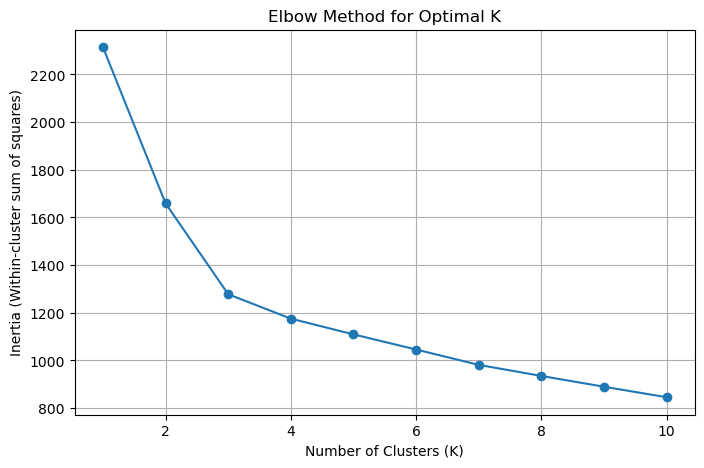

Optimal K from elbow method: 3
Model score (inertia) with K=3: 1277.93


C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the wine dataset
data = load_wine()
X = data.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.show()

# Final model with optimal K = 3
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

# Print model score (inertia)
model_score = kmeans_final.inertia_
print(f"Optimal K from elbow method: {optimal_k}")
print(f"Model score (inertia) with K={optimal_k}: {model_score:.2f}")

In [5]:
# Using the elbow method on the scaled Wine dataset, the 
# optimal number of clusters was determined to be K = 3. 
# This choice is based on the point in the inertia plot 
# where adding more clusters results in only marginal 
# improvements—indicating diminishing returns. The inertia
# score at K = 3 is 1277.93, reflecting the compactness of 
# the clusters formed. This result aligns well with the 
# known structure of the Wine dataset, which contains three 
# actual classes (types of wine). Thus, the KMeans algorithm effectively 
# uncovered the natural grouping in the data, and 
# K = 3 provides a good balance between model simplicity and cluster separation.

## Question 3 (40 pts): KNN Practice

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# --------------------------
# Step 1: Data Preparation
# --------------------------

# Training data: [Distance, Weight, Traffic]
X_train = np.array([
    [5, 2, 3],
    [15, 5, 7],
    [10, 3, 5],
    [3, 1, 2],
    [18, 6, 9]
])

y_train = np.array([25, 60, 45, 20, 75])  # Delivery time

# Test samples
X_test = np.array([
    [12, 4, 6],  # Test 1
    [4, 2, 3]    # Test 2
])

# --------------------------
# Step 2: Min-Max Normalization
# --------------------------
scaler = MinMaxScaler()
X_all = np.vstack((X_train, X_test))
X_scaled = scaler.fit_transform(X_all)

X_train_scaled = X_scaled[:len(X_train)]
X_test_scaled = X_scaled[len(X_train):]

# --------------------------
# Step 3: Euclidean Distance
# --------------------------
def euclidean_distances(train, test_point):
    return np.sqrt(np.sum((train - test_point) ** 2, axis=1))

# --------------------------
# Step 4: KNN Prediction
# --------------------------
def knn_predict(X_train, y_train, test_point, k):
    distances = euclidean_distances(X_train, test_point)
    nearest_indices = np.argsort(distances)[:k]
    nearest_targets = y_train[nearest_indices]
    predicted = np.mean(nearest_targets)
    return predicted, distances

# --------------------------
# Step 5: Output Results
# --------------------------
for i, test_point in enumerate(X_test_scaled):
    print(f"\n--- Test Sample {i+1} ---")
    for k in [1, 3]:
        pred, dists = knn_predict(X_train_scaled, y_train, test_point, k)
        print(f"Predicted Delivery Time (k={k}): {pred:.2f} minutes")
        print(f"Distances to Training Samples: {dists.round(4)}")


--- Test Sample 1 ---
Predicted Delivery Time (k=1): 45.00 minutes
Distances to Training Samples: [0.7493 0.3169 0.2796 1.023  0.7097]
Predicted Delivery Time (k=3): 60.00 minutes
Distances to Training Samples: [0.7493 0.3169 0.2796 1.023  0.7097]

--- Test Sample 2 ---
Predicted Delivery Time (k=1): 25.00 minutes
Distances to Training Samples: [0.0667 1.1065 0.5307 0.2547 1.4986]
Predicted Delivery Time (k=3): 30.00 minutes
Distances to Training Samples: [0.0667 1.1065 0.5307 0.2547 1.4986]


In [ ]:
# The K-Nearest Neighbor (KNN) algorithm was applied to predict delivery times 
# for two test samples. For Test Sample 1, using K=1, the prediction was 
# 45 minutes based on the closest training sample, while K=3 provided a prediction 
# of 60 minutes by averaging the nearest three training samples. For Test Sample 2, 
# K=1 predicted 25 minutes based on the nearest sample, and K=3 gave a more balanced 
# prediction of 30 minutes by considering the three closest neighbors. The K=3 
# approach smooths out extreme values and provides more robust predictions, while K=1 
# is more sensitive to individual data points. This demonstrates that increasing K 
# can lead to more stable and reliable predictions, especially in the presence of outliers.